In [1]:
import tensorflow as tf
import time
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import tensorflow.keras.backend as K
#import tensorflow_probability as tfp

from tensorflow.keras.layers import Layer, InputSpec,Input
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Conv1D,  Dense, Flatten, Reshape

from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
from sklearn.cluster import KMeans

from datasets import load_mnist, load_usps, load_mrec, load_slice

In [2]:
# load dataset
Ndataset='mrec'
Nclusters=16
Nsave_dir='temp'
Ngamma=0.1
Ntol=0.001
#num_batches = 100
batch_size =1024
learning_rate = 0.001
nGamma=0.1
NDevice=tf.test.gpu_device_name()
NCPU='/cpu:0'
NGPU=tf.test.gpu_device_name()

In [3]:
xData, YY = load_slice("mrec20190904f.csv")
#with tf.device(NDevice):
with tf.device('/cpu:0'):
    
    dataset = tf.data.Dataset.from_tensor_slices((xData))
#dataset = tdataset.batch(batch_size).shuffle(buffer_size=100000)

MM (7712, 66)
MREC: (7711, 32)


In [4]:
xData

array([[0.05561037, 0.04318443, 0.05002649, ..., 0.16060081, 0.0763102 ,
        0.06368236],
       [0.08618634, 0.07507642, 0.08281572, ..., 0.13080736, 0.10019507,
        0.01549834],
       [0.07405214, 0.00241551, 0.04778676, ..., 0.03785952, 0.04453998,
        0.11113999],
       ...,
       [0.04142028, 0.05661774, 0.05793701, ..., 0.06401027, 0.05489008,
        0.07310668],
       [0.09379942, 0.1479919 , 0.18577969, ..., 0.16991216, 0.20763922,
        0.17640758],
       [0.12745108, 0.3931567 , 0.38491315, ..., 0.09436806, 0.04692026,
        0.06373969]], dtype=float32)

In [25]:
def mse(y,y_p):
    return np.mean((y - y_p)**2)

In [33]:
def create_tab(ainp,aWindow):
    xx=[0.0]
    for i in range(aWindow-1):
            x=np.roll(ainp,-i-2,0)
            m=mse(x,ainp)
            print('i=',i,' mse=',m)
            xx=tf.concat([xx,[m]],0)
            #print('x2=',xx.shape)
    return xx    

In [48]:
y_pr=create_tab(xData,2425)
print(y_pr.shape)

i= 0  mse= 0.008052376
i= 1  mse= 0.008995745
i= 2  mse= 0.0093223965
i= 3  mse= 0.0092432955
i= 4  mse= 0.009706127
i= 5  mse= 0.010014029
i= 6  mse= 0.010415556
i= 7  mse= 0.010669768
i= 8  mse= 0.01077204
i= 9  mse= 0.010814649
i= 10  mse= 0.010899743
i= 11  mse= 0.010953161
i= 12  mse= 0.011033297
i= 13  mse= 0.011077832
i= 14  mse= 0.011112637
i= 15  mse= 0.011135098
i= 16  mse= 0.011124979
i= 17  mse= 0.011137688
i= 18  mse= 0.011168187
i= 19  mse= 0.01117175
i= 20  mse= 0.011192697
i= 21  mse= 0.0111547755
i= 22  mse= 0.011108552
i= 23  mse= 0.011136566
i= 24  mse= 0.011092646
i= 25  mse= 0.011099151
i= 26  mse= 0.011060571
i= 27  mse= 0.011018021
i= 28  mse= 0.011004023
i= 29  mse= 0.01097863
i= 30  mse= 0.010925896
i= 31  mse= 0.010858077
i= 32  mse= 0.0107465
i= 33  mse= 0.010617862
i= 34  mse= 0.0104462225
i= 35  mse= 0.009590962
i= 36  mse= 0.009081641
i= 37  mse= 0.00935818
i= 38  mse= 0.009616623
i= 39  mse= 0.009821879
i= 40  mse= 0.009541521
i= 41  mse= 0.00915799
i= 42

i= 698  mse= 0.011125353
i= 699  mse= 0.011158003
i= 700  mse= 0.011154998
i= 701  mse= 0.011169128
i= 702  mse= 0.011197237
i= 703  mse= 0.01124078
i= 704  mse= 0.011254682
i= 705  mse= 0.011292588
i= 706  mse= 0.011313646
i= 707  mse= 0.011342436
i= 708  mse= 0.011341801
i= 709  mse= 0.011313835
i= 710  mse= 0.011301082
i= 711  mse= 0.011272644
i= 712  mse= 0.011257587
i= 713  mse= 0.011281769
i= 714  mse= 0.011247906
i= 715  mse= 0.011177243
i= 716  mse= 0.011107353
i= 717  mse= 0.011017968
i= 718  mse= 0.010991869
i= 719  mse= 0.010903579
i= 720  mse= 0.010794344
i= 721  mse= 0.010545919
i= 722  mse= 0.010147588
i= 723  mse= 0.009642354
i= 724  mse= 0.009614751
i= 725  mse= 0.009525622
i= 726  mse= 0.0095016705
i= 727  mse= 0.0091923615
i= 728  mse= 0.00774799
i= 729  mse= 0.0077229585
i= 730  mse= 0.0076621324
i= 731  mse= 0.008945341
i= 732  mse= 0.009570627
i= 733  mse= 0.009604179
i= 734  mse= 0.009751364
i= 735  mse= 0.009982994
i= 736  mse= 0.010506137
i= 737  mse= 0.01082982

i= 1067  mse= 0.0112169655
i= 1068  mse= 0.011256729
i= 1069  mse= 0.011304282
i= 1070  mse= 0.011309422
i= 1071  mse= 0.011349007
i= 1072  mse= 0.011326888
i= 1073  mse= 0.011329435
i= 1074  mse= 0.011323574
i= 1075  mse= 0.011336264
i= 1076  mse= 0.0113328295
i= 1077  mse= 0.011296582
i= 1078  mse= 0.011264877
i= 1079  mse= 0.011221861
i= 1080  mse= 0.011212148
i= 1081  mse= 0.011238004
i= 1082  mse= 0.011195156
i= 1083  mse= 0.011171394
i= 1084  mse= 0.011094761
i= 1085  mse= 0.01092629
i= 1086  mse= 0.010917295
i= 1087  mse= 0.010877545
i= 1088  mse= 0.010801547
i= 1089  mse= 0.010616562
i= 1090  mse= 0.010130029
i= 1091  mse= 0.009771198
i= 1092  mse= 0.009645953
i= 1093  mse= 0.009567042
i= 1094  mse= 0.010098674
i= 1095  mse= 0.010106583
i= 1096  mse= 0.00981828
i= 1097  mse= 0.009741674
i= 1098  mse= 0.009494634
i= 1099  mse= 0.01056708
i= 1100  mse= 0.010794317
i= 1101  mse= 0.010896922
i= 1102  mse= 0.010999372
i= 1103  mse= 0.011074681
i= 1104  mse= 0.011106731
i= 1105  mse=

i= 1435  mse= 0.011294776
i= 1436  mse= 0.011302759
i= 1437  mse= 0.011314716
i= 1438  mse= 0.0113473
i= 1439  mse= 0.011344532
i= 1440  mse= 0.0113280825
i= 1441  mse= 0.011324367
i= 1442  mse= 0.011292283
i= 1443  mse= 0.011283322
i= 1444  mse= 0.011236048
i= 1445  mse= 0.011231134
i= 1446  mse= 0.01115733
i= 1447  mse= 0.011010424
i= 1448  mse= 0.010935778
i= 1449  mse= 0.010785488
i= 1450  mse= 0.01075233
i= 1451  mse= 0.010644263
i= 1452  mse= 0.010291241
i= 1453  mse= 0.009847557
i= 1454  mse= 0.0095743
i= 1455  mse= 0.009384448
i= 1456  mse= 0.009592131
i= 1457  mse= 0.009516314
i= 1458  mse= 0.009042262
i= 1459  mse= 0.007762106
i= 1460  mse= 0.0059155785
i= 1461  mse= 0.0070221126
i= 1462  mse= 0.008590213
i= 1463  mse= 0.00955142
i= 1464  mse= 0.009881936
i= 1465  mse= 0.009912683
i= 1466  mse= 0.010052445
i= 1467  mse= 0.010352538
i= 1468  mse= 0.010688855
i= 1469  mse= 0.010936587
i= 1470  mse= 0.011011299
i= 1471  mse= 0.011049142
i= 1472  mse= 0.011106096
i= 1473  mse= 0.

i= 1802  mse= 0.011310367
i= 1803  mse= 0.011300992
i= 1804  mse= 0.011279614
i= 1805  mse= 0.011299435
i= 1806  mse= 0.011310162
i= 1807  mse= 0.011289902
i= 1808  mse= 0.011289772
i= 1809  mse= 0.011265803
i= 1810  mse= 0.011240527
i= 1811  mse= 0.011222797
i= 1812  mse= 0.011174094
i= 1813  mse= 0.011145101
i= 1814  mse= 0.011044956
i= 1815  mse= 0.010881805
i= 1816  mse= 0.010835407
i= 1817  mse= 0.010669728
i= 1818  mse= 0.010801023
i= 1819  mse= 0.010709039
i= 1820  mse= 0.010550858
i= 1821  mse= 0.010390032
i= 1822  mse= 0.009876972
i= 1823  mse= 0.0092794
i= 1824  mse= 0.009835033
i= 1825  mse= 0.009983011
i= 1826  mse= 0.0101928655
i= 1827  mse= 0.010170799
i= 1828  mse= 0.009654509
i= 1829  mse= 0.010093764
i= 1830  mse= 0.010104576
i= 1831  mse= 0.010622146
i= 1832  mse= 0.010871963
i= 1833  mse= 0.011026471
i= 1834  mse= 0.011082724
i= 1835  mse= 0.011162802
i= 1836  mse= 0.011148373
i= 1837  mse= 0.011205418
i= 1838  mse= 0.011236143
i= 1839  mse= 0.0112593
i= 1840  mse= 0

i= 2167  mse= 0.0112986155
i= 2168  mse= 0.011351138
i= 2169  mse= 0.011374717
i= 2170  mse= 0.011346653
i= 2171  mse= 0.011327877
i= 2172  mse= 0.011280462
i= 2173  mse= 0.011270011
i= 2174  mse= 0.011241979
i= 2175  mse= 0.011236526
i= 2176  mse= 0.011211403
i= 2177  mse= 0.0110771125
i= 2178  mse= 0.010940046
i= 2179  mse= 0.010816552
i= 2180  mse= 0.010737473
i= 2181  mse= 0.010677561
i= 2182  mse= 0.010517124
i= 2183  mse= 0.010139702
i= 2184  mse= 0.009480503
i= 2185  mse= 0.0087590795
i= 2186  mse= 0.009129255
i= 2187  mse= 0.009416633
i= 2188  mse= 0.00953232
i= 2189  mse= 0.009470923
i= 2190  mse= 0.008683406
i= 2191  mse= 0.008154324
i= 2192  mse= 0.00821866
i= 2193  mse= 0.00892
i= 2194  mse= 0.009798953
i= 2195  mse= 0.009933219
i= 2196  mse= 0.009982211
i= 2197  mse= 0.010226931
i= 2198  mse= 0.010467814
i= 2199  mse= 0.010888055
i= 2200  mse= 0.011011788
i= 2201  mse= 0.011083692
i= 2202  mse= 0.011140895
i= 2203  mse= 0.011180904
i= 2204  mse= 0.011242282
i= 2205  mse= 0

In [49]:
def loss_mse( inputs, targets):
    #error = inputs - targets
    #sq=tf.square(error)
    #sq=tf.keras.losses.MSE(inputs,targets)
    sq=tf.keras.losses.logcosh(inputs,targets)

    #return tf.compute_average_loss(   sq,        global_batch_size=GLOBAL_BATCH_SIZE)
    return tf.reduce_mean(sq)
def loss_kld(inputs,pred):
    _nn=tf.keras.losses.KLD( inputs,pred)
    return tf.reduce_mean(_nn)

In [50]:
def pre_train():
    #start = time.time()
    loss = 0
    xoptimizer = tf.optimizers.Adam()
    
    for (batch, (x)) in enumerate(dataset.take(-1)):
        #if batch % 10 == 0:
        #print('mse',x.shape)
                 
        #     print('.',end='')
        #    print('Batch {} loss{:.3f}'.format(batch,loss) )
    
        loss = 0
        with tf.device(NGPU):    
            with tf.GradientTape() as tape:
                g_encoder.trainable = True
                g_decoder.trainable = True
                z = g_encoder(x, training=True)
                x_hat = g_decoder(z, training=True)
                loss = loss_mse(x, x_hat)
            #print('mse',x.shape, loss.numpy())
                  
        #for  v in variables:
        #    print ("batch: ", v.name,'  ',v.shape)
        #print('nam:',g_encoder.trainable_variables.shape)
        #print('var:',variables)
                variables = g_encoder.trainable_variables + g_decoder.trainable_variables
                gradients = tape.gradient(loss, variables)
        
                xoptimizer.apply_gradients(zip(gradients, variables))
        #xoptimizer.minimize(loss,variables)
    return loss

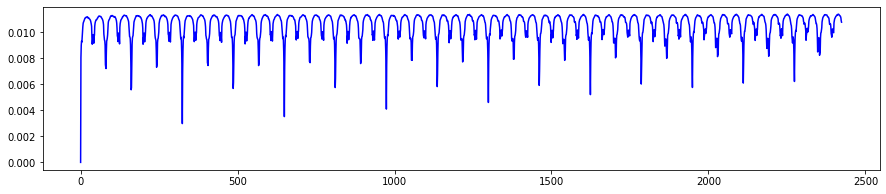

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))

#fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
#ax1.plot(y_pr, 'g-')
#ax2.plot(YY.iloc[:,2], 'b-')
#ax1.figure(figsize=(15,3))

#plt.imshow(y_pr.transpose(), cmap='hot', interpolation='nearest',aspect='auto')
#ax = sns.heatmap(yyt, linewidth=0.5)
plt.plot(y_pr, c='blue')
#print(YY.shape)
yyu=YY.iloc[:,2]*0.00002

#plt.plot(yyu)
#plt.show()
plt.show()